<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from skimage.color import rgb2gray
from skimage.feature import corner_harris, corner_peaks
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.feature import hog,blob_dog, blob_log, blob_doh
from skimage.feature import daisy
from math import sqrt

data_file = Path("data/NB_1", "cleaned_data.hdf")
data_from_nb1 = pd.read_hdf(data_file, "starting_data")

<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [2]:
def ft0(image):
    '''
    Returns the pixel size of the image
    '''
    return image.size


def ft1(image):
    '''
    Returns the average of the red-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.mean(image[:,:,0].flatten())
    else:
        return 0    
    
def ft2(image):
    '''
    Returns the average of the green-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.mean(image[:,:,0].flatten())
    else:
        return 0  
    
def ft3(image):
    '''
    Returns the average of the blue-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.mean(image[:,:,2].flatten())
    else:
        return 0    

def ft4(image):
    '''
    Returns the aspect ratio of the image
    '''
    return np.round(image.shape[1]/image.shape[0], 3)

def ft5(image):
    '''
    Returns the luminosity of the image
    '''
    if len(image.shape) == 3:
        return np.mean(((0.2126*image[:,:,0]) + (0.7152*image[:,:,1]) + (0.0722*image[:,:,2])).flatten())
    else:
        return np.mean(image.flatten())
    
def ft6(image):
    '''
    Returns the standard deviation of the red-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.std(image[:,:,0].flatten())
    else:
        return 0    
    
def ft7(image):
    '''
    Returns the standard deviation of the green-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.std(image[:,:,0].flatten())
    else:
        return 0  
    
def ft8(image):
    '''
    Returns the standard deviation of the blue-channel pictures for the images
    '''
    if len(image.shape) == 3:
        return np.std(image[:,:,2].flatten())
    else:
        return 0    

def ft9(image):
    '''
    Returns number of corners detected in a grayscale image
    '''
    return len(corner_peaks(corner_harris(image)))

def ft10(canny_score):
    '''
    Returns number of pixels detected on some edge in a grayscale image
    '''
    return np.sum(canny_score)
    
def ft11(hog_fd):
    '''
    Return standard deviation among histogram of oriented gradients for grayscale image
    '''
    return np.std(hog_fd)

def ft12(blobs):
    '''
    Returns mean of blobs(regions in digital images that differ in properties compared to surroundings) 
    in a grayscale image
    '''
    return np.mean(blobs)

def ft13(image):
    '''
    Returns the mean of pixel intensities for edges for grayscale image found using Sobel edge-detection algorithm
    '''
    return np.mean(sobel(image))

def ft14(image):
    '''
    Return standard deviation of a grayscale image
    '''
    return np.std(image.flatten())
        
def ft15(image):
    '''
    Returns the standard deviation of pixel intensities for edges for grayscale image found using Sobel edge-detection algorithm
    '''
    return np.std(sobel(image))

def ft16(canny_score):
    '''
    Returns average number of pixels detected on some edge in a grayscale image
    '''
    return np.mean(canny_score)

def ft17(blobs):
    '''
    Returns standard deviation of blobs(regions in digital images that differ in properties compared to surroundings) 
    in a grayscale image
    '''
    return np.std(blobs)


Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

<h4> Graphs </h4>

The final 3 graphs we have selected are at the bottom of this notebook (after creating the dataframe). Below are some of the graphs (rough)  we used for finding out the variation in the values of the features for different encodings. 

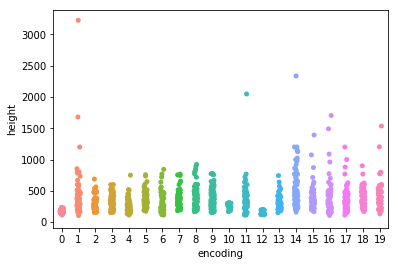

In [3]:
data_from_nb1['height'] = data_from_nb1.apply(lambda x: x['pictures'].shape[0], axis =1)
data_from_nb1['width'] = data_from_nb1.apply(lambda x: x['pictures'].shape[1], axis =1)
data_from_nb1['ar'] = data_from_nb1.apply(lambda x: np.round(x['pictures'].shape[1]/x['pictures'].shape[0], 2), axis =1)
data_from_nb1.groupby('encoding')['height', 'width'].mean()
data_from_nb1[['encoding','height','width']]
sns.stripplot(x='encoding', y='height', data=data_from_nb1)

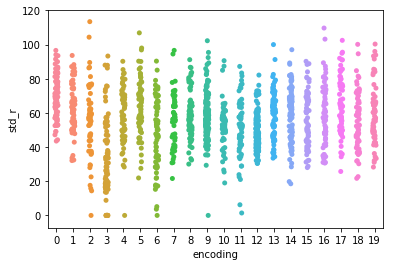

In [4]:
data_from_nb1['mean_r'] = data_from_nb1.apply(lambda x: np.mean(x['pictures'][:,:,0].flatten()) if len(x['pictures'].shape) == 3 else 0, axis =1)
data_from_nb1['mean_g'] = data_from_nb1.apply(lambda x: np.mean(x['pictures'][:,:,1].flatten()) if len(x['pictures'].shape) == 3 else 0, axis =1)
data_from_nb1['mean_b'] = data_from_nb1.apply(lambda x: np.mean(x['pictures'][:,:,2].flatten()) if len(x['pictures'].shape) == 3 else 0, axis =1)

data_from_nb1['std_r'] = data_from_nb1.apply(lambda x: np.std(x['pictures'][:,:,0].flatten()) if len(x['pictures'].shape) == 3 else 0, axis =1)
sns.stripplot(x='encoding', y='std_r', data=data_from_nb1)

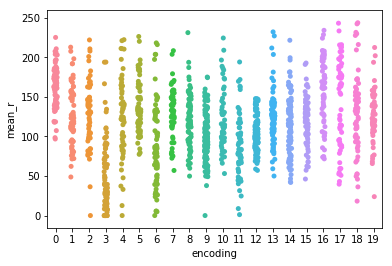

In [5]:
sns.stripplot(x='encoding', y='mean_r', data=data_from_nb1)

In [6]:
from skimage.color import rgb2gray
data_from_nb1['grayscale'] = data_from_nb1.apply(lambda x: rgb2gray(x['pictures']), axis=1)

In [7]:
data_from_nb1.apply(lambda x: len(x['pictures'].shape), axis=1).value_counts()
data_from_nb1.apply(lambda x: np.mean(x['pictures'][:,:,0].flatten()) if len(x['pictures'].shape) == 3 else 0, axis =1)
# np.mean(data_from_nb1.iloc[169]['pictures'][:,:,0].flatten())

0       183.355727
1       210.739822
2       170.123787
3       152.159752
4       147.397886
5       167.209223
6       185.957680
7       117.929114
8       180.656595
9       161.148872
10      150.511232
11      203.726504
12      164.604563
13      203.017158
14       96.754551
15      174.865318
16       98.426973
17      118.465075
18      162.078550
19      174.612989
20      159.319227
21      179.303701
22      183.353871
23      163.710021
24      176.205630
25      118.945767
26      107.341031
27      147.548565
28      132.558557
29      139.497299
           ...    
1471    105.007752
1472    140.048337
1473    119.835316
1474     71.847220
1475     93.602996
1476    162.344057
1477    138.811351
1478    117.918362
1479    121.245695
1480     68.168729
1481    120.585773
1482     65.711134
1483    128.022628
1484    152.524690
1485     91.219737
1486    201.992204
1487     76.610487
1488    137.324527
1489    161.512497
1490    121.803452
1491    153.783903
1492    152.

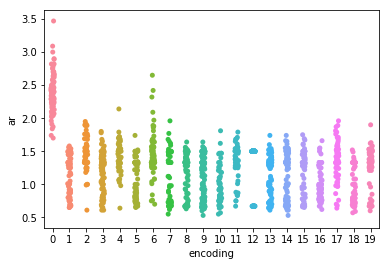

In [8]:
sns.stripplot(x='encoding', y='ar', data=data_from_nb1)

In [9]:
from skimage.feature import corner_harris, corner_peaks

data_from_nb1['corner_h_r'] = data_from_nb1.apply(lambda x: len(corner_peaks(corner_harris(x['pictures'][:,:,0]))) if len(x['grayscale'].shape) == 3 else len(corner_peaks(corner_harris(x['grayscale']))), axis=1)
data_from_nb1['corner_h_r']


0         22
1         41
2         16
3         41
4         34
5         52
6         25
7         58
8         38
9         29
10        21
11        29
12        22
13        36
14        20
15        38
16        20
17        29
18        33
19        30
20        33
21        15
22         9
23        29
24        21
25        67
26        55
27        31
28        27
29        69
        ... 
1471     397
1472      73
1473     342
1474      63
1475     187
1476      38
1477     681
1478     116
1479      67
1480      69
1481      95
1482    1630
1483      20
1484     445
1485      15
1486     279
1487      36
1488     223
1489     180
1490     234
1491      22
1492      98
1493      48
1494     198
1495     216
1496     153
1497     363
1498      91
1499     170
1500     271
Name: corner_h_r, Length: 1501, dtype: int64

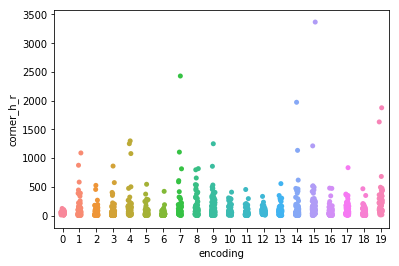

In [10]:
sns.stripplot(x='encoding', y='corner_h_r', data=data_from_nb1)

In [11]:
from skimage import feature
data_from_nb1['edges'] = data_from_nb1.apply(lambda x: np.sum(feature.canny(x['grayscale'],sigma =1)), axis=1)
# data_from_nb1['edges']

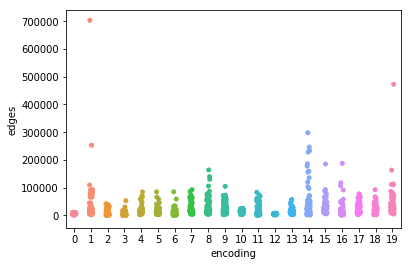

In [12]:
sns.stripplot(x='encoding', y='edges', data=data_from_nb1)

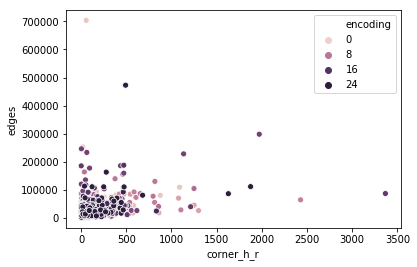

In [13]:
sns.scatterplot(x='corner_h_r', y='edges', hue='encoding', data=data_from_nb1)

In [14]:
def image_mat(mat):
    if len(mat.shape) == 3:
        return (0.2126*mat[:,:,0]) + (0.7152*mat[:,:,1]) + (0.0722*mat[:,:,2])
    else:
        return mat


data_from_nb1['rgb_brightness'] = data_from_nb1.apply(lambda x: np.mean(image_mat(x['pictures']).flatten()), axis = 1)


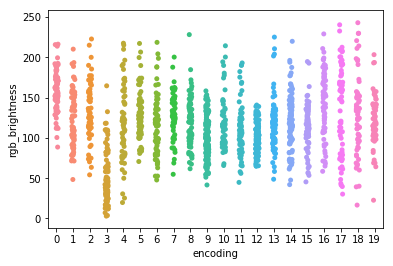

In [15]:
sns.stripplot(x='encoding', y='rgb_brightness', data=data_from_nb1)

<h4> Sources </h4>

The Sources for all the features we have leveraged in the model are listed below. 

[1] http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html

[2] https://en.wikipedia.org/wiki/Feature_detection_(computer_vision)

[3] https://www.scipy-lectures.org/packages/scikit-image/index.html#image-preprocessing-enhancement

[4] http://scikit-image.org/docs/dev/api/skimage.filters.html

[5] http://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html

[6] http://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

[7] http://flothesof.github.io/removing-background-scikit-image.html

[8] https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/

[9] https://programtalk.com/python-examples/skimage.feature.hog/

[10] https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features

[11] https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html



<h4> DataFrame Creation </h4>

In [16]:
def to_grayscale(image):
    return rgb2gray(image)

def canny_score(image):
    return feature.canny(image,sigma =1)

def hog_fd(image):
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8),
                   cells_per_block=(1, 1), visualise=True)
    return fd

def find_blobs(image):
    blobs_doh = blob_doh(image, max_sigma=30, threshold=.01)
    blobs_doh[:, 2] = blobs_doh[:, 2] * sqrt(2)
    return blobs_doh[:,2]

def feature_frame(df):
    '''
    Returns data-frame with all the features now inside, and calculated
    '''
    def df_apply(func, col='pictures'):
        return df.apply(lambda x: func(x[col]), axis=1)
    df['grayscale'] = df_apply(to_grayscale)
    print('Calculated grayscale')
    df['canny_score'] = df_apply(canny_score,'grayscale')
    print('Calculated canny score')
    df['hog_fd'] = df_apply(hog_fd,'grayscale')
    print('Calculated hog')
    df['blobs'] = df_apply(find_blobs,'grayscale')
    print('Calculated blobs')
    
    df['ft0'] = df_apply(ft0)
    print('Done feature 1')
    df['ft1'] = df_apply(ft1)
    print('Done feature 2')
    df['ft2'] = df_apply(ft2)
    print('Done feature 3')
    df['ft3'] = df_apply(ft3)
    print('Done feature 4')
    df['ft4'] = df_apply(ft4)
    print('Done feature 5')
    df['ft5'] = df_apply(ft5)
    print('Done feature 6')
    df['ft6'] = df_apply(ft6)
    print('Done feature 7')
    df['ft7'] = df_apply(ft7)
    print('Done feature 8')
    df['ft8'] = df_apply(ft8)
    print('Done feature 9')
    df['ft9'] = df_apply(ft9,'grayscale')
    print('Done feature 10')
    df['ft10'] = df_apply(ft10,'canny_score')
    print('Done feature 11')
    df['ft11'] = df_apply(ft11,'hog_fd')
    print('Done feature 12')
    df['ft12'] = df_apply(ft12,'blobs')
    print('Done feature 13')
    df['ft13'] = df_apply(ft13,'grayscale')
    print('Done feature 14')
    df['ft14'] = df_apply(ft14,'grayscale')
    print('Done feature 15')
    df['ft15'] = df_apply(ft15,'grayscale')
    print('Done feature 16')
    df['ft16'] = df_apply(ft16,'canny_score')
    print('Done feature 17')
    df['ft17'] = df_apply(ft17,'hog_fd')
    print('Done feature 18')
    return df
    
full_feature_frame = feature_frame(data_from_nb1)

Calculated grayscale
Calculated canny score


/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Calculated hog
Calculated blobs
Done feature 1
Done feature 2
Done feature 3
Done feature 4
Done feature 5
Done feature 6
Done feature 7
Done feature 8
Done feature 9
Done feature 10
Done feature 11
Done feature 12
Done feature 13


/Users/akshaypunhani/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/akshaypunhani/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Done feature 14
Done feature 15
Done feature 16
Done feature 17
Done feature 18


In [17]:
#Saving the full feature matrix to file to be used by Notebook 3
from pathlib import Path
Path("data/NB_2").mkdir(parents=True, exist_ok=True)
data_file = Path("data/NB_2", "cleaned_data.hdf") # Path of hdf file
full_feature_frame[['ft'+str(i) for i in range(18)]].to_hdf(data_file, "full_feature")

In [19]:
from skimage import io
# Reading and Saving the validation full feature matrix
validation_path = '20_Validation/'
file_list= os.listdir(validation_path)
image_list = [io.imread(validation_path + animal) for animal in file_list if os.path.isfile(validation_path + animal)]
validation_df = pd.DataFrame(image_list, columns=['pictures'])
val_full_feature_frame = feature_frame(validation_df)
val_data_file = Path("data/NB_2", "val_cleaned_data.hdf") # Path of hdf file
val_full_feature_frame[['ft'+str(i) for i in range(18)]].to_hdf(val_data_file, "val_full_feature")
print('Saved validation full feature matrix')

Calculated grayscale
Calculated canny score


/anaconda3/lib/python3.6/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Calculated hog
Calculated blobs
Done feature 1
Done feature 2
Done feature 3
Done feature 4
Done feature 5
Done feature 6
Done feature 7
Done feature 8
Done feature 9
Done feature 10
Done feature 11
Done feature 12
Done feature 13


/Users/akshaypunhani/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/akshaypunhani/.local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Done feature 14
Done feature 15
Done feature 16
Done feature 17
Done feature 18
Saved validation full feature matrix


<h4> Final Graphs </h4>

In [20]:
#Importing the feature frame directly from the data available locally for the graphs
data_file_2 = Path("data/NB_2", "cleaned_data.hdf")
full_feature_frame_2 = pd.read_hdf(data_file_2)
full_feature_frame_2['encoding'] = data_from_nb1['encoding']

Text(0, 0.5, 'Mean of the Red Channel')

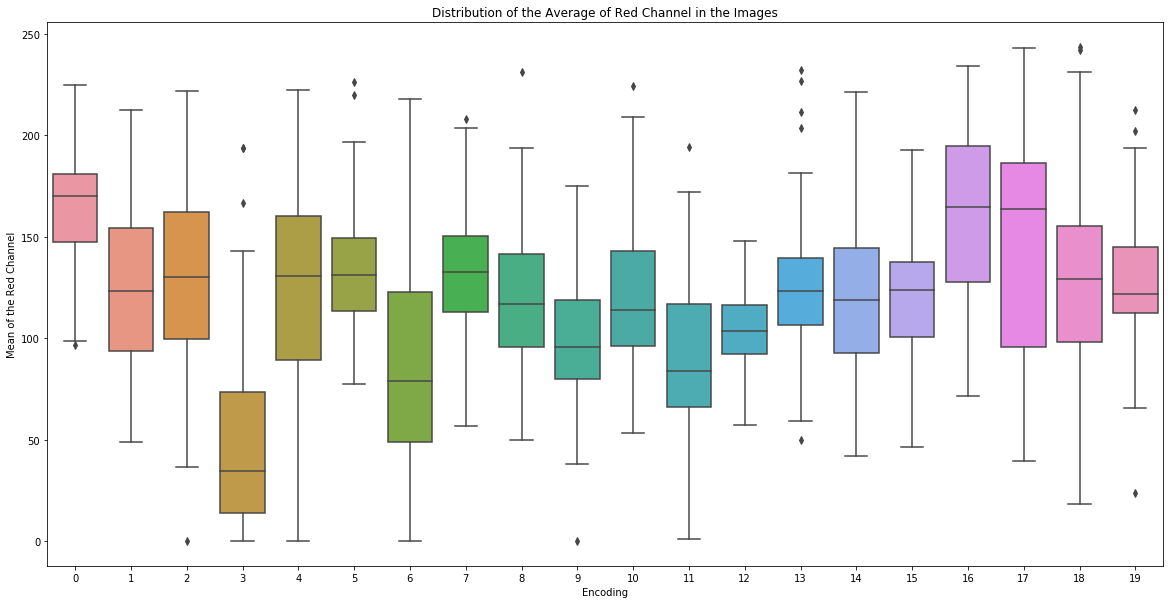

In [21]:
# Graph - 1 - Feature 1 variation among different encoded images

plt.figure(figsize=(20,10))
sns.boxplot(x='encoding', y ='ft1', data = full_feature_frame_2)
plt.title("Distribution of the Average of Red Channel in the Images")
plt.xlabel("Encoding")
plt.ylabel("Mean of the Red Channel")

Text(0.5, 0, 'Encoding')

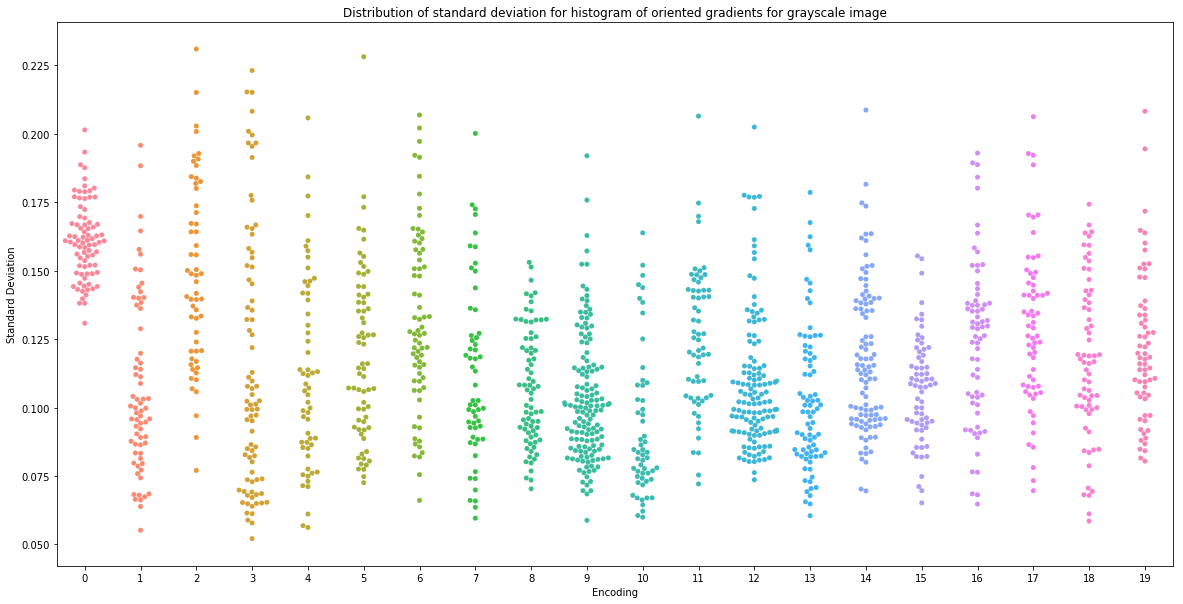

In [22]:
# Graph - 2 - Feature 11 variation among different encoded images

plt.figure(figsize=(20,10))
sns.swarmplot(x='encoding', y='ft11', data=full_feature_frame_2)
plt.title("Distribution of standard deviation for histogram of oriented gradients for grayscale image")
plt.ylabel("Standard Deviation")
plt.xlabel("Encoding")

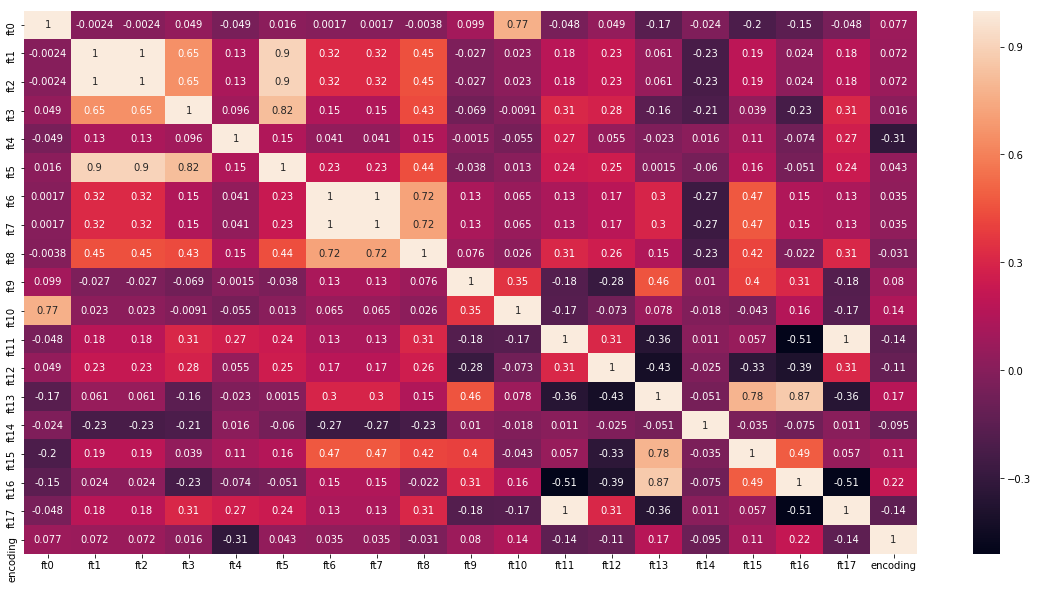

In [23]:
# Graph - 3 Finding out the correlation among each of our features in our final dataframe

correlation = full_feature_frame_2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot = True)